#**Title: Hate Speech and Offensive Language Detection using SVM, Logistic Regression, Random Forest, and Gradient Boosting Classifier**

**Group Members:**

1. Tarafder Razibur Rahman **: M230205007**
2. Md Fahim Shahriar **: M230205011**

**Dataset Link:** https://www.kaggle.com/code/kirollosashraf/hate-speech-and-offensive-language-detection/input

#**Objective:** To identify or predict whether tweets contain "Hate Speech and Offensive Language"

#**Summery:**
####**Introduction**:
 Identifying hate and offensive speech is essential for several reasons. It protects individuals and communities from harm and reduces stress caused by harmful content. It ensures safe and inclusive online environments by adhering to community standards, enhancing user experience, and retaining a diverse user base. It helps platforms comply with legal requirements and fulfill ethical obligations to prevent the spread of harmful content. Additionally, it promotes healthy discourse by encouraging respectful conversations and reducing polarization. Finally, it provides data for training effective content moderation models, improving AI systems and ensuring they do not amplify harmful speech.

####**Working Procedure**:
Sure! Here's a summary of the workflow:

1. **Data Loading and Exploration**:
   - Upload the dataset and read it into a Pandas DataFrame.
   - Display the first few rows, information, and summary statistics of the dataset.
   - Check for missing values and handle them if necessary.
   - Visualize the distribution of classes in the dataset using a count plot.

2. **Data Preprocessing**:
   - Separate the features (tweets) and the target variable (class).
   - Convert class labels (assuming 0 -> 1, others -> 0) to ensure binary classification.
   - Split the dataset into training and testing sets.

3. **Feature Engineering**:
   - Vectorize the text data using TF-IDF vectorization.
   - Transform both the training and testing sets.

4. **Model Training and Evaluation**:
   - Train multiple classification models:
     - Support Vector Machine (SVM)
     - Gradient Boosting
     - Logistic Regression
     - Random Forest
   - Evaluate each model's performance using metrics such as accuracy, precision, recall, and F1-score.
   - Visualize the confusion matrix for each model to understand its classification performance.
   - Compare the performance of all models using a bar chart.

5. **Additional Analysis**:
   - Plot the Receiver Operating Characteristic (ROC) curve to evaluate model performance across different threshold levels.
   - Plot the Precision-Recall curve to visualize the trade-off between precision and recall.
   - Plot the distribution of prediction probabilities for each model to understand the confidence levels of the predictions.
   - Visualize the distribution of prediction probabilities using both boxplots and violin plots for comparison across models.

6. **Summary**:
   - The workflow provides a comprehensive analysis of multiple classification models on the given dataset.
   - It enables the comparison of model performance metrics, evaluation of classification performance using confusion matrices, and visualization of prediction probabilities for further insights.
   - The workflow assists in selecting the most suitable model for the classification task based on performance and confidence in predictions.

**import** Libraries and pandas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

Uploading Dataset (CSV file)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


This code load the dataset into dataframe for processing. The output of the program will be tabular form for showing the whole dataset as excel format.

In [3]:
df = pd.read_csv("train.csv")

Next 3 steps are exploring data

In [4]:
print(df.head())

   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB
None


In [6]:
print(df.describe())

              count  hate_speech_count  offensive_language_count  \
count  24783.000000       24783.000000              24783.000000   
mean       3.243473           0.280515                  2.413711   
std        0.883060           0.631851                  1.399459   
min        3.000000           0.000000                  0.000000   
25%        3.000000           0.000000                  2.000000   
50%        3.000000           0.000000                  3.000000   
75%        3.000000           0.000000                  3.000000   
max        9.000000           7.000000                  9.000000   

       neither_count         class  
count   24783.000000  24783.000000  
mean        0.549247      1.110277  
std         1.113299      0.462089  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         0.000000      1.000000  
max         9.000000      2.000000  


Checking Missing Values

In [7]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


Filling missing values

In [8]:
df = df.fillna('')

Plot the distribution of the classes in the dataset

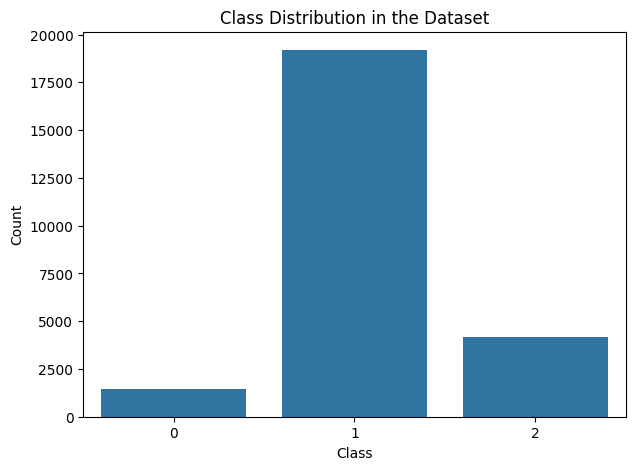

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(x='class', data=df)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Separate features and target variable

In [10]:
X = df['tweet']
y = df['class']

Convert class labels (assuming 0 -> 1, others -> 0)

In [11]:
y = y.apply(lambda x: 1 if x == 0 else 0)

Split the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Vectorize the text data

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Function to evaluate models

In [14]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1, predictions

**SVM model**

In [15]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_predictions = evaluate_model(svm_model, X_test_tfidf, y_test)


**Gradient Boosting model**

In [16]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_tfidf, y_train)
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_predictions = evaluate_model(gb_model, X_test_tfidf, y_test)

**Logistic Regression model**

In [17]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_predictions = evaluate_model(lr_model, X_test_tfidf, y_test)

**Random Forest model**

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_predictions = evaluate_model(rf_model, X_test_tfidf, y_test)

**Print all the result**

In [19]:
print(f"SVM Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-score: {svm_f1}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, F1-score: {gb_f1}")
print(f"Logistic Regression Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1-score: {lr_f1}")
print(f"Random Forest Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-score: {rf_f1}")

SVM Accuracy: 0.9473471857978616, Precision: 0.6623376623376623, Recall: 0.17832167832167833, F1-score: 0.2809917355371901
Gradient Boosting Accuracy: 0.9419003429493645, Precision: 0.4852941176470588, Recall: 0.11538461538461539, F1-score: 0.1864406779661017
Logistic Regression Accuracy: 0.9441194270728263, Precision: 0.576271186440678, Recall: 0.11888111888111888, F1-score: 0.19710144927536233
Random Forest Accuracy: 0.9435142223118822, Precision: 0.546875, Recall: 0.12237762237762238, F1-score: 0.2


**Confusion matrix heatmaps**

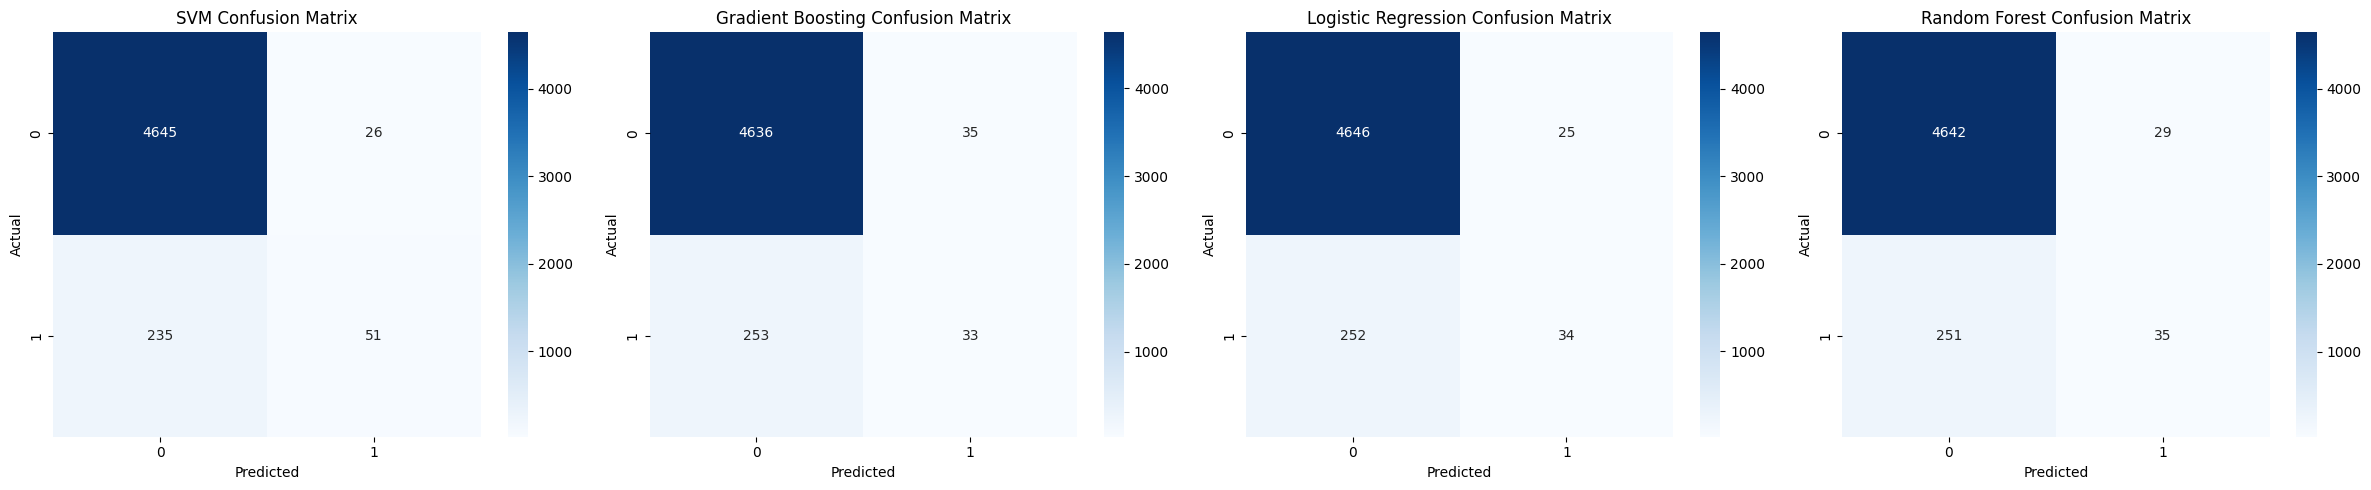

In [20]:
plt.figure(figsize=(24, 5))
plt.subplot(1, 4, 1)
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 2)
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 3)
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 4, 4)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Bar chart comparison of metrics**

In [21]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
gb_scores = [gb_accuracy, gb_precision, gb_recall, gb_f1]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]


In [22]:
x = np.arange(len(metrics))  # label locations
width = 0.2  # width of the bars

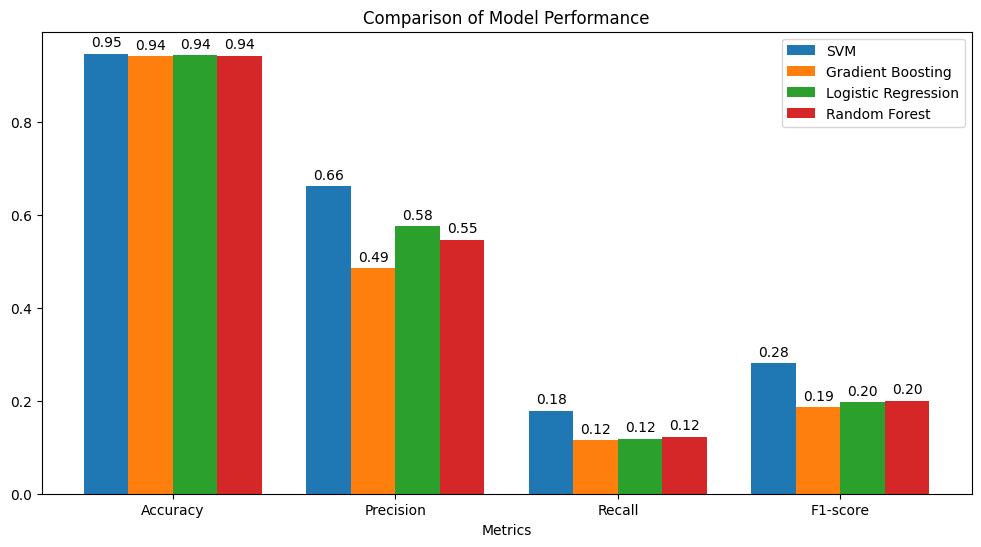

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, svm_scores, width, label='SVM')
rects2 = ax.bar(x - 0.5*width, gb_scores, width, label='Gradient Boosting')
rects3 = ax.bar(x + 0.5*width, lr_scores, width, label='Logistic Regression')
rects4 = ax.bar(x + 1.5*width, rf_scores, width, label='Random Forest')

ax.set_xlabel('Metrics')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

**Additional chart - ROC Curve**

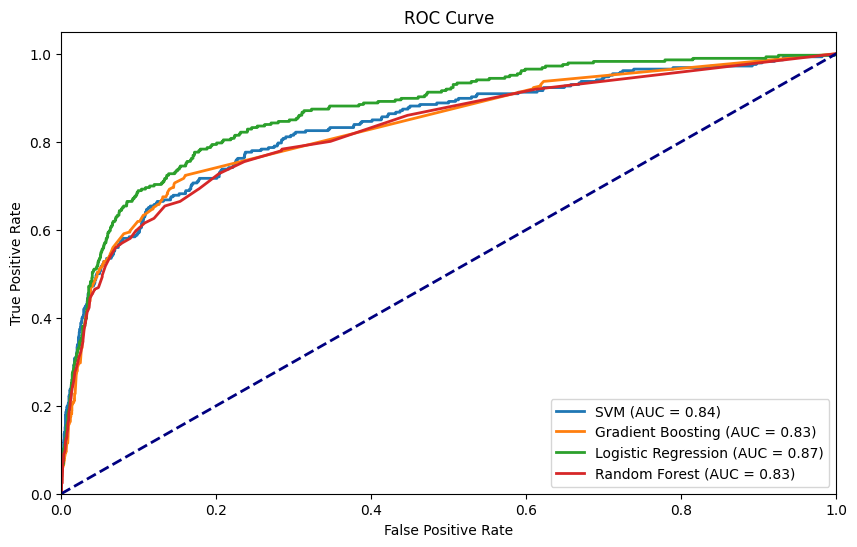

In [31]:
plt.figure(figsize=(10, 6))
models = [('SVM', svm_model), ('Gradient Boosting', gb_model), ('Logistic Regression', lr_model), ('Random Forest', rf_model)]

for name, model in models:
    y_prob = model.decision_function(X_test_tfidf) if hasattr(model, "decision_function") else model.predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Additional chart - Precision-Recall Curve**

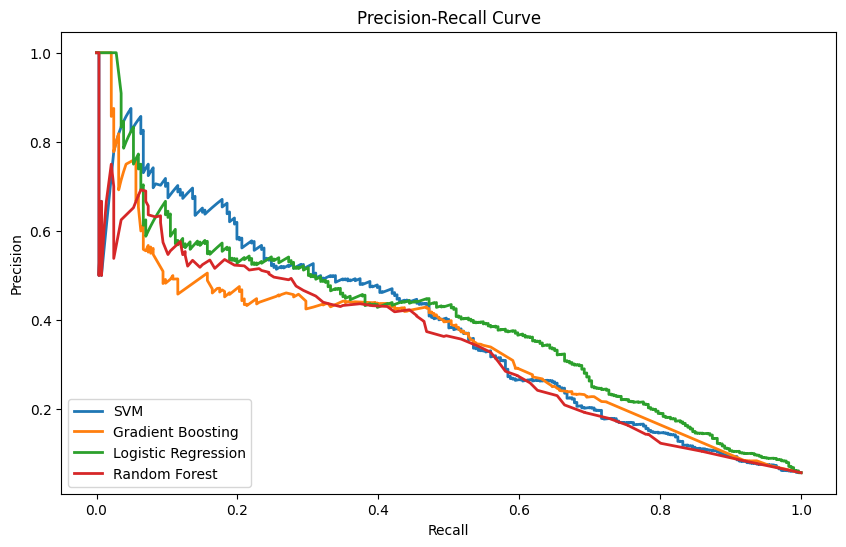

In [32]:
plt.figure(figsize=(10, 6))
for name, model in models:
    y_prob = model.decision_function(X_test_tfidf) if hasattr(model, "decision_function") else model.predict_proba(X_test_tfidf)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, lw=2, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Distribution of Prediction Probabilities**

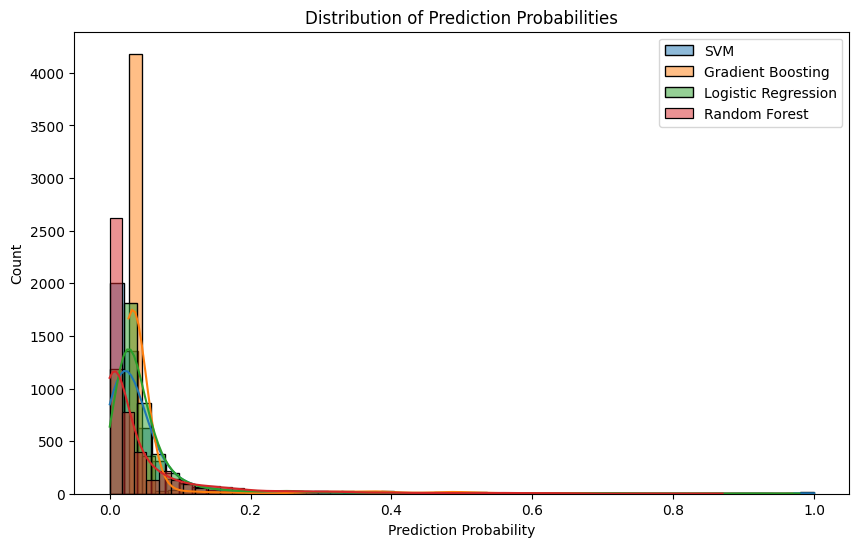

In [33]:
plt.figure(figsize=(10, 6))
for name, model in models:
    y_prob = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_tfidf)
    sns.histplot(y_prob, kde=True, label=name, bins=50)

plt.xlabel('Prediction Probability')
plt.title('Distribution of Prediction Probabilities')
plt.legend()
plt.show()

**Additional chart - Boxplot of prediction probabilities**

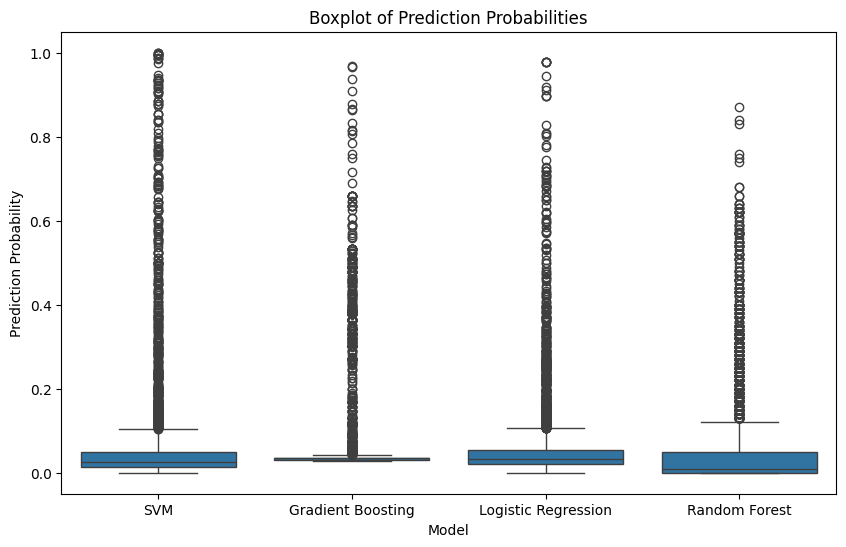

In [34]:
plt.figure(figsize=(10, 6))
all_probs = []
for name, model in models:
    y_prob = model.predict_proba(X_test_tfidf)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_tfidf)
    all_probs.append(pd.DataFrame({'Model': name, 'Probability': y_prob}))

prob_df = pd.concat(all_probs)
sns.boxplot(x='Model', y='Probability', data=prob_df)
plt.xlabel('Model')
plt.ylabel('Prediction Probability')
plt.title('Boxplot of Prediction Probabilities')
plt.show()

**Additional chart - Violin plot of prediction probabilities**

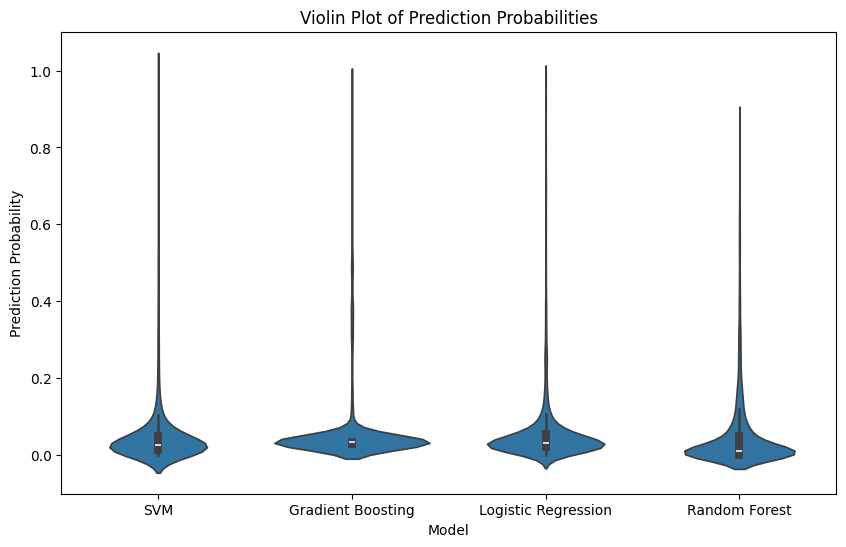

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Probability', data=prob_df)
plt.xlabel('Model')
plt.ylabel('Prediction Probability')
plt.title('Violin Plot of Prediction Probabilities')
plt.show()